In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

In [ ]:
# 定义常量
theta_range = np.pi
n_angles = 180
n_pixels = 128
r_max = n_pixels / 2

In [ ]:
# 定义将投影数据转换为图像的函数
def backproject(projections, angles):
    image = np.zeros((n_pixels, n_pixels))
    x, y = np.indices((n_pixels, n_pixels))
    x = x - n_pixels / 2
    y = y - n_pixels / 2
    for i in range(n_angles):
        angle = angles[i]
        projection = projections[:, i]
        cos_theta = np.cos(angle)
        sin_theta = np.sin(angle)
        r = x * cos_theta + y * sin_theta
        r += r_max
        r = np.round(r).astype(int)
        valid = np.logical_and(r >= 0, r < n_pixels)
        image.flat[r[valid] * n_pixels + np.arange(n_pixels)[valid]] += projection[valid]
    return image

In [ ]:
# 生成模拟数据集
projections = np.zeros((n_pixels, n_angles))
x, y = np.indices((n_pixels, n_pixels))
mask = (x - n_pixels / 2) ** 2 + (y - n_pixels / 2) ** 2 <= r_max ** 2
for i in range(n_angles):
    theta = i * theta_range / n_angles
    xc = r_max * np.cos(theta) + n_pixels / 2
    yc = r_max * np.sin(theta) + n_pixels / 2
    line = np.linspace(-r_max, r_max, n_pixels)
    x1 = xc - line * np.sin(theta)
    y1 = yc + line * np.cos(theta)
    projections[:, i] = mask[x1.astype(int), y1.astype(int)]

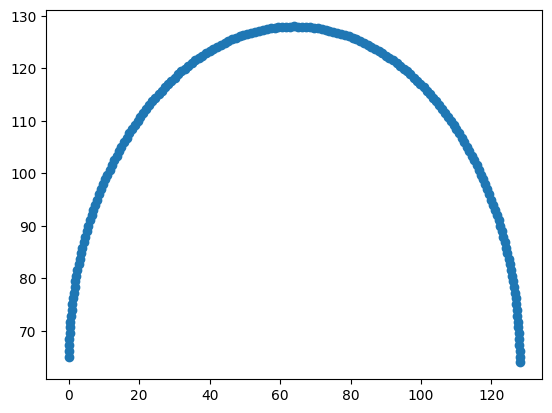

In [51]:

projections = np.zeros((n_pixels, n_angles))
x, y = np.indices((n_pixels, n_pixels))
mask = (x - n_pixels / 2) ** 2 + (y - n_pixels / 2) ** 2 <= r_max ** 2

xc = []
yc = []

for i in range(n_angles):
    theta = i * theta_range / n_angles
    xc.append(r_max * np.cos(theta) + n_pixels / 2)
    yc.append(r_max * np.sin(theta) + n_pixels / 2)

plt.scatter(xc,yc)
   

In [47]:
a = np.array([])
np.append(1)
a

TypeError: append() missing 1 required positional argument: 'values'

In [ ]:
# 对投影数据进行滤波
projections = fftpack.fft(projections, axis=0)
freqs = fftpack.fftfreq(n_pixels)[:, np.newaxis]
ramp_filter = np.sqrt(freqs ** 2 + freqs.T ** 2)
projections *= ramp_filter
projections = fftpack.ifft(projections, axis=0).real

# 进行反投影
angles = np.linspace(0, theta_range, n_angles, endpoint=False)
image = backproject(projections, angles)

# 显示结果
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [ ]:
np.indices((3,2))
